# Image Segmentation con arquitecura UNet y fastai2

Breve introducción a la segmentación de imágenes, en particular utilizando la arquitectura Unet, una técnica de vanguardia que ha ganado muchos concursos de Kaggle y es ampliamente utilizada en la industria. Los modelos de segmentación de imágenes nos permiten clasificar con precisión cada parte de una imagen, hasta el nivel de píxel.

Es importante tener instalado fastai2 para usar el API _SegmentationDataLoaders_ de alto nivel para cargar las imagenes y usar otros métodos nuevos de esta version, pudes usar la siguiente instrucción para intarlar:<br>
__! pip -q install fastai2__

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

Librerias necesarias:

In [2]:
from fastai.vision.all import *

import numpy as np
import pandas as pd
import torch
from pathlib import Path

In [3]:
torch.cuda.is_available()

True

## Camvid: Motion-based Segmentation and Recognition Dataset <br>

La biblioteca fastai, viene con la clase URLs que le permiten descargar algunos conjuntos de datos seleccionados. Los conjuntos de datos con SAMPLE o TINY en su nombre son subconjuntos de los conjuntos de datos originales. Para obtener detalles sobre los conjuntos de datos, puede ver la página web de conjuntos de datos fast.ai. <br>
En este caso, los datos que vamos a utilizar son CAMVID_TINY para segmentación semántica por píxel de más de 700 imágenes, cada una inspeccionada y confirmada por una segunda persona para garantizar su precisión y podemos obtenerlos llamando como en la siguiente celda:

In [4]:
path = untar_data(URLs.CAMVID_TINY)

In [5]:
!ls {path}

codes.txt  images  labels  models


Extraemos los nombres de las imagenes:

In [6]:
fnames = get_image_files(path/'images')

In [7]:
fnames[0]

Path('/home/pclemente/.fastai/data/camvid_tiny/images/Seq05VD_f01320.png')

Función para etiquetar las imagenes:

In [8]:
def label_func(x): return path/'labels'/f'{x.stem}_P{x.suffix}'

Guardar los códigos para cada clase de segmentación del archivo codes.txt:

In [9]:
codes = np.loadtxt(path/'codes.txt', dtype=str)

In [10]:
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

## En este caso existen 2 formas de __cargar los datos__ con la libreria fastai:

## 1. High level API

In [11]:
dls = SegmentationDataLoaders.from_label_func(path, fnames, label_func, codes=codes, bs=32)

## 2. Mid level API

In [ ]:
#dls = data.dataloaders(path/'images')

### Ahora mostraremos un batch de imágenes:

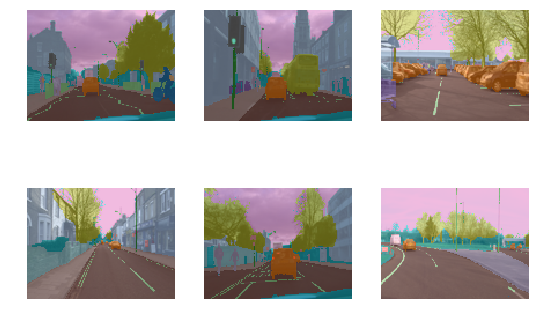

In [12]:
dls.show_batch(max_n=6, nrows=2)

## Entrenamiento

In [13]:
learn = unet_learner(dls, arch=resnet34)

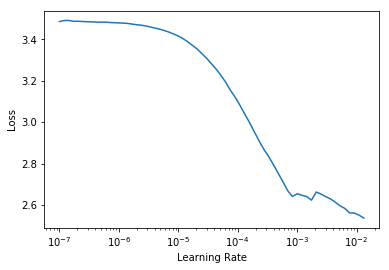

In [14]:
lr = learn.lr_find()

In [15]:
lr

SuggestedLRs(lr_min=0.0013182567432522773, lr_steep=0.00015848931798245758)

In [16]:
learn.fine_tune(10, lr[1])

epoch,train_loss,valid_loss,time
0,3.474642,3.083592,00:03


epoch,train_loss,valid_loss,time
0,3.097243,2.897079,00:02
1,2.999566,2.703129,00:01
2,2.855333,2.371443,00:01
3,2.686889,2.197066,00:01
4,2.545752,1.896914,00:01
5,2.410059,1.883337,00:01
6,2.297368,1.689673,00:01
7,2.196908,1.646490,00:01
8,2.112443,1.617040,00:01
9,2.043897,1.609281,00:01


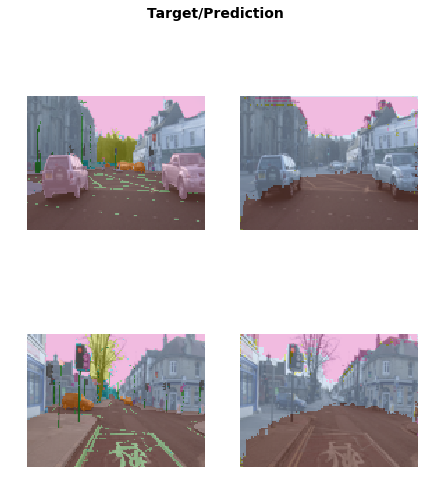

In [17]:
learn.show_results(max_n=6, figsize=(7, 8))

# Referencias:

- https://course.fast.ai/datasets
- https://tezike.github.io/blog/posts/2020/04/01/Understanding-fastai-vision.html#The-DATABLOCK
- https://docs.fast.ai/vision.data.html#ImageBlock
- https://course18.fast.ai/lessons/lesson14.html
- https://forums.fast.ai/t/fine-tune-vs-fit-one-cycle-unfreeze-fit-one-cycle/66704/8